In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


def scrape_election_results(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}")
    
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')  # Update this selector based on the actual table structure
    
    if table is None:
        print(soup.prettify())  # Print the HTML content for inspection
        raise Exception("Table not found on the page. Check the structure of the page and update the scraping logic.")
    
    rows = table.find_all('tr')
    
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if cols:  # Only append non-empty rows
            data.append(cols)
    
    if not data:
        raise Exception("No data found in the table. Check the table structure and ensure it's correctly selected.")
    
    # Example: Define columns based on table structure
    columns = ["Party Name", "Seats Won", "Leading/Trailing", "Total Seats"]  # Update columns as per actual data
    df = pd.DataFrame(data, columns=columns)
    return df

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'  # Update with the actual URL
try:
    df = scrape_election_results(url)
    df.to_csv('raw_data.csv', index=False)
    print(df.head())
except Exception as e:
    print(e)

# Load the data
df = pd.read_csv('raw_data.csv')

                            Party Name Seats Won Leading/Trailing Total Seats
0         Bharatiya Janata Party - BJP       240                0         240
1       Indian National Congress - INC        99                0          99
2                 Samajwadi Party - SP        37                0          37
3  All India Trinamool Congress - AITC        29                0          29
4      Dravida Munnetra Kazhagam - DMK        22                0          22


In [2]:
# Insight 1: Total seats won by each party
total_seats = df['Seats Won'].sum()
print(f"Total seats: {total_seats}")

Total seats: 543


In [3]:
# Insight 2: Party with the highest number of seats
top_party = df.loc[df['Seats Won'].idxmax()]
print(f"Party with the highest number of seats: {top_party['Party Name']} with {top_party['Seats Won']} seats")

Party with the highest number of seats: Bharatiya Janata Party - BJP with 240 seats


In [4]:
# Insight 3: Party with the lowest number of seats
bottom_party = df.loc[df['Seats Won'].idxmin()]
print(f"Party with the lowest number of seats: {bottom_party['Party Name']} with {bottom_party['Seats Won']} seats")

Party with the lowest number of seats: United People’s Party, Liberal - UPPL with 1 seats


In [5]:
# Insight 4: Average seats won by parties
average_seats = df['Seats Won'].mean()
print(f"Average seats won by parties: {average_seats}")

Average seats won by parties: 12.928571428571429


In [6]:
# Insight 5: Top 3 parties by percentage of total seats won
df['Percentage of Total Seats'] = (df['Seats Won'] / df['Seats Won'].sum()) * 100
top_3_parties_percentage = df.nlargest(3, 'Percentage of Total Seats')
print("Top 3 parties by percentage of total seats won:")
print(top_3_parties_percentage[['Party Name', 'Seats Won', 'Percentage of Total Seats']])


Top 3 parties by percentage of total seats won:
                       Party Name  Seats Won  Percentage of Total Seats
0    Bharatiya Janata Party - BJP        240                  44.198895
1  Indian National Congress - INC         99                  18.232044
2            Samajwadi Party - SP         37                   6.813996


In [7]:
# Insight 6: Parties with seats between 5 and 10
mid_range_parties = df[(df['Seats Won'] >= 5) & (df['Seats Won'] <= 10)]
print("Parties with seats between 5 and 10:")
print(mid_range_parties[['Party Name', 'Seats Won']])

Parties with seats between 5 and 10:
                                           Party Name  Seats Won
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT          9
8   Nationalist Congress Party – Sharadchandra Paw...          8
9                                     Shiv Sena - SHS          7
10             Lok Janshakti Party(Ram Vilas) - LJPRV          5
41                                  Independent - IND          7


In [8]:
# Insight 7: Comparison of top 2 parties
top_2_parties = df.nlargest(2, 'Seats Won')
print("Comparison of top 2 parties:")
print(top_2_parties[['Party Name', 'Seats Won', 'Percentage of Total Seats']])


Comparison of top 2 parties:
                       Party Name  Seats Won  Percentage of Total Seats
0    Bharatiya Janata Party - BJP        240                  44.198895
1  Indian National Congress - INC         99                  18.232044


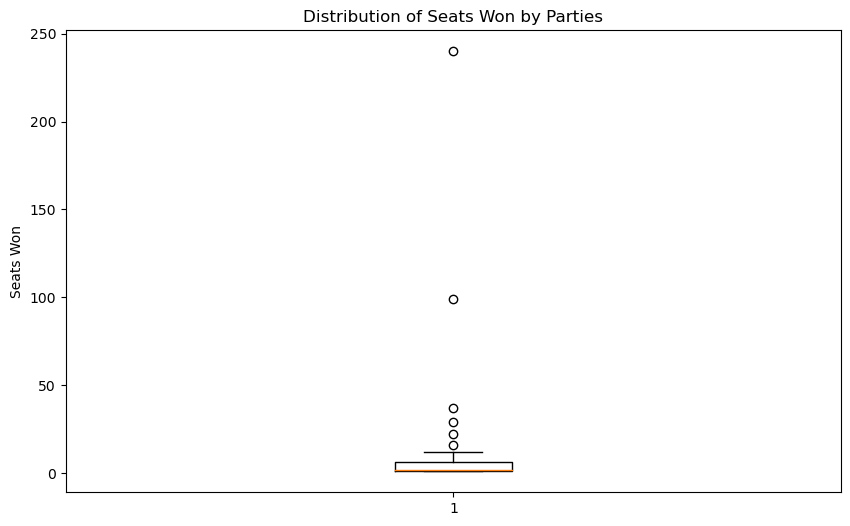

In [9]:
# Insight 8: Distribution of seats (box plot)
plt.figure(figsize=(10, 6))
plt.boxplot(df['Seats Won'].dropna())
plt.title('Distribution of Seats Won by Parties')
plt.ylabel('Seats Won')
plt.savefig('distribution_of_seats_boxplot.png')
plt.show()

In [10]:
# Insight 9: Range of seats won (min and max)
min_seats = df['Seats Won'].min()
max_seats = df['Seats Won'].max()
print(f"Range of seats won by parties: {min_seats} to {max_seats}")

Range of seats won by parties: 1 to 240


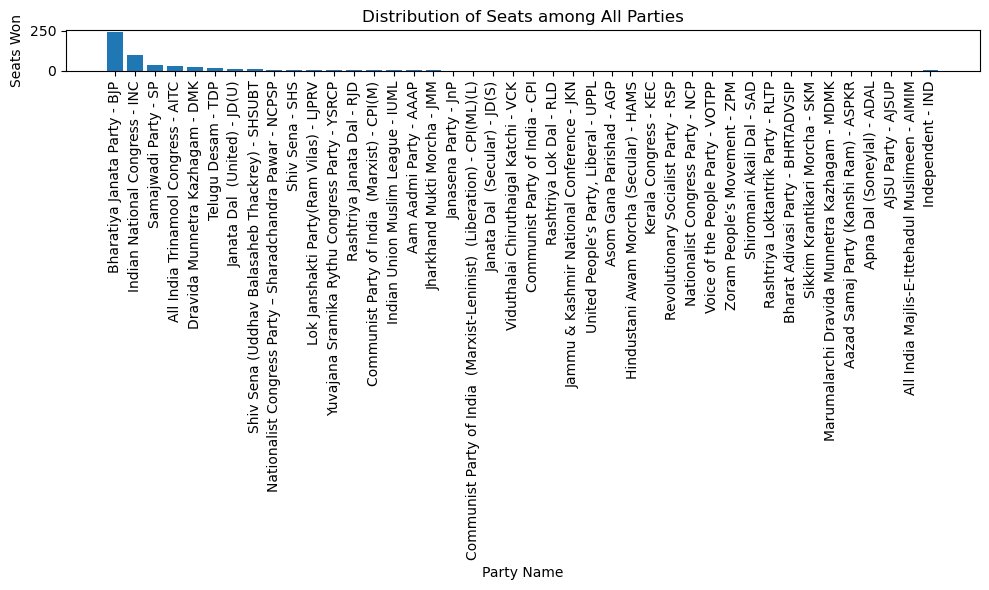

In [11]:
# Insight 10: Distribution of seats among all parties (bar plot)
plt.figure(figsize=(10, 6))
plt.bar(df['Party Name'], df['Seats Won'])
plt.xticks(rotation=90)
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Distribution of Seats among All Parties')
plt.tight_layout()
plt.savefig('distribution_of_seats_barplot.png')
plt.show()

In [13]:
df.to_csv('election_insights.csv', index=False)